<a href="https://colab.research.google.com/github/XTMay/python-data-science-course/blob/main/notebooks/Lec_12_Visual_EDA_with_Real_Dataset_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦠 COVID-19临床试验数据分析实战教程

## 📚 课程概述

欢迎来到COVID-19临床试验数据分析课程！在这个Notebook中，我们将分析来自ClinicalTrials.gov的真实医疗研究数据，掌握数据科学在医学研究中的应用。

### 🎯 学习目标
通过本课程，您将学会：
- 📊 **数据清洗与预处理**：处理缺失值、统一格式、去重
- 🔍 **探索性数据分析(EDA)**：发现医疗数据中的模式和趋势
- 📈 **医疗数据可视化**：创建专业的医学研究图表
- 📉 **统计分析**：假设检验、显著性分析
- 🧠 **如何利用真实医疗数据集提取信息和趋势**

### 🏥 数据集介绍
**数据来源**：ClinicalTrials.gov - 全球最大的临床试验数据库
**数据规模**：约5,783条COVID-19相关临床试验记录
**文件大小**：7.42 MB

**主要字段说明**：
- **NCT Number**: 每个临床试验的唯一编号
- **Title**: 研究标题
- **Status**: 研究状态（Recruiting, Completed, Active等）
- **Study Results**: 是否有研究结果
- **Conditions**: 研究的疾病或条件
- **Interventions**: 干预措施（药物、疫苗、医疗器械等）
- **Sponsor/Collaborators**: 研究赞助方或合作方
- **Start Date**: 研究开始日期
- **Phases**: 临床试验阶段


## 1. 📦 导入必需的库

首先导入数据科学分析所需的Python库：

检测到操作系统: Darwin
系统中找到 464 个字体
成功设置字体: Hiragino Sans GB
当前字体设置: ['Hiragino Sans GB', 'DejaVu Sans']
✅ 所有库导入成功！
📊 准备开始COVID-19临床试验数据分析...


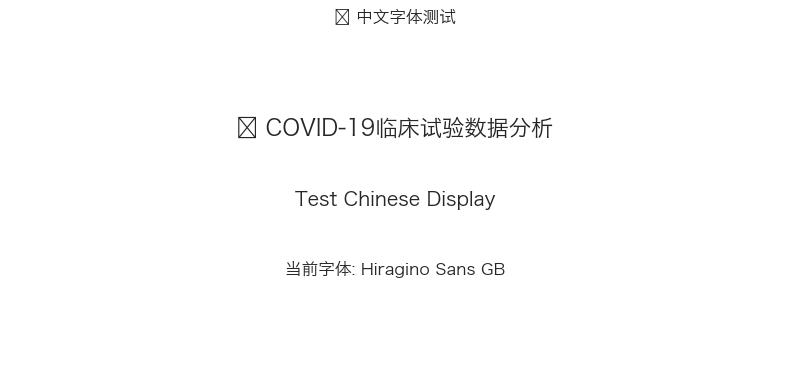

In [ ]:
# 数据处理和数值计算
import pandas as pd
import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 统计分析
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# 日期处理
import datetime as dt

# 文本处理
import re
from collections import Counter

# 平台检测
import platform

# 设置可视化样式
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("Set2")

def setup_chinese_font():
    """设置中文字体显示，适配不同操作系统"""
    system = platform.system()
    print(f"检测到操作系统: {system}")

    # 重建字体缓存（可选，首次运行时有用）
    try:
        fm._rebuild()
    except:
        pass

    if system == "Darwin":  # macOS
        # macOS 优先字体列表
        mac_fonts = [
            'PingFang SC',           # 苹方简体
            'Hiragino Sans GB',      # 冬青黑体简体中文
            'STHeiti',               # 华文黑体
            'Heiti SC',              # 黑体-简
            'Arial Unicode MS',      # Arial Unicode MS
            'SimHei'                 # 黑体（如果安装了）
        ]
        fonts_to_try = mac_fonts
    elif system == "Windows":
        fonts_to_try = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong']
    else:  # Linux
        fonts_to_try = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei', 'Noto Sans CJK SC', 'Droid Sans Fallback', 'DejaVu Sans']

    # 获取系统可用字体
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    print(f"系统中找到 {len(available_fonts)} 个字体")

    # 设置字体
    font_found = False
    for font_name in fonts_to_try:
        if font_name in available_fonts:
            plt.rcParams['font.sans-serif'] = [font_name] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
            print(f"成功设置字体: {font_name}")
            font_found = True
            break

    if not font_found:
        # 备选方案：搜索包含中文关键词的字体
        chinese_fonts = [f for f in available_fonts if any(keyword in f.lower()
                        for keyword in ['pingfang', 'hiragino', 'stheiti', 'heiti', 'han', 'noto', 'wenquanyi', 'droid', 'cjk'])]
        if chinese_fonts:
            plt.rcParams['font.sans-serif'] = [chinese_fonts[0]] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"使用备选中文字体: {chinese_fonts[0]}")
            font_found = True

    if not font_found:
        print("警告: 未找到合适的中文字体，中文可能显示为方块")
        # 安装字体的建议
        print("建议安装中文字体:")
        if system == "Linux":
            print("  Ubuntu/Debian: sudo apt-get install fonts-wqy-microhei fonts-noto-cjk")
            print("  CentOS/RHEL: sudo yum install wqy-microhei-fonts")
        # 即使没有中文字体也设置unicode_minus
        plt.rcParams['axes.unicode_minus'] = False

    # 显示当前字体设置
    print(f"当前字体设置: {plt.rcParams['font.sans-serif'][:2]}")
    return font_found

def test_chinese_display():
    """测试中文字体显示效果"""
    import matplotlib.pyplot as plt

    # 创建一个简单的测试图
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.text(0.5, 0.7, '🦠 COVID-19临床试验数据分析', fontsize=16, ha='center', transform=ax.transAxes)
    ax.text(0.5, 0.5, 'Test Chinese Display', fontsize=14, ha='center', transform=ax.transAxes)
    ax.text(0.5, 0.3, f'当前字体: {plt.rcParams["font.sans-serif"][0]}', fontsize=12, ha='center', transform=ax.transAxes)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('🔤 中文字体测试')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# 执行字体设置
setup_chinese_font()

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

print("✅ 所有库导入成功！")
print("📊 准备开始COVID-19临床试验数据分析...")

# 测试中文显示
test_chinese_display()

In [ ]:
# 如果没有中文字体，可以下载并使用字体文件
def download_and_use_chinese_font():
    """下载并使用中文字体（备用方案）"""
    import os
    import requests
    from pathlib import Path

    # 创建字体目录
    font_dir = Path.home() / '.fonts'
    font_dir.mkdir(exist_ok=True)

    font_file = font_dir / 'SourceHanSansCN-Regular.otf'

    if not font_file.exists():
        print("正在下载中文字体...")
        try:
            # 使用Google Fonts的开源中文字体
            url = "https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SimplifiedChinese/SourceHanSansCN-Regular.otf"
            response = requests.get(url, timeout=30)
            with open(font_file, 'wb') as f:
                f.write(response.content)
            print(f"字体下载完成: {font_file}")
        except Exception as e:
            print(f"字体下载失败: {e}")
            return False

    # 注册字体
    try:
        fm.fontManager.addfont(str(font_file))
        plt.rcParams['font.sans-serif'] = ['Source Han Sans CN'] + plt.rcParams['font.sans-serif']
        plt.rcParams['axes.unicode_minus'] = False
        print("成功加载下载的中文字体")
        return True
    except Exception as e:
        print(f"字体加载失败: {e}")
        return False

# 测试并提供字体安装建议
print("\n🔧 如果中文显示不正常，请执行以下命令安装中文字体:")
print("Linux (Ubuntu/Debian): sudo apt-get install fonts-wqy-microhei fonts-noto-cjk")
print("Linux (CentOS/RHEL): sudo yum install wqy-microhei-fonts google-noto-cjk-fonts")
print("macOS: 系统自带中文字体")
print("Windows: 系统自带中文字体")
print("\n或者运行以下代码自动下载字体:")
print("download_and_use_chinese_font()")


🔧 如果中文显示不正常，请执行以下命令安装中文字体:
Linux (Ubuntu/Debian): sudo apt-get install fonts-wqy-microhei fonts-noto-cjk
Linux (CentOS/RHEL): sudo yum install wqy-microhei-fonts google-noto-cjk-fonts
macOS: 系统自带中文字体
Windows: 系统自带中文字体

或者运行以下代码自动下载字体:
download_and_use_chinese_font()


## 2. 📂 数据加载与初步探索

让我们加载COVID-19临床试验数据并查看基本信息：

In [ ]:
# 加载数据
df = pd.read_csv('/Users/xiaotingzhou/Documents/Lectures/python-data-science-course/data/COVID clinical trials.csv')

print(f"🏥 COVID-19临床试验数据集基本信息：")
print(f"试验记录数：{df.shape[0]:,}")
print(f"数据字段数：{df.shape[1]:,}")
print(f"数据大小：{df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n前3行数据预览：")
df.head(3)

🏥 COVID-19临床试验数据集基本信息：
试验记录数：5,783
数据字段数：27
数据大小：14.78 MB

前3行数据预览：


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482


In [ ]:
# 查看数据字段信息和缺失值统计
print("📋 数据字段信息和缺失值统计：")
info_df = pd.DataFrame({
    '字段名': df.columns,
    '数据类型': df.dtypes.values,
    '缺失值数量': df.isnull().sum().values,
    '缺失值百分比': (df.isnull().sum().values / len(df) * 100).round(2)
})

# 按缺失值百分比排序
info_df = info_df.sort_values('缺失值百分比', ascending=False)
print(info_df.to_string(index=False))

📋 数据字段信息和缺失值统计：
                    字段名    数据类型  缺失值数量  缺失值百分比
   Results First Posted  object   5747   99.38
        Study Documents  object   5601   96.85
                Acronym  object   3303   57.12
                 Phases  object   2461   42.56
          Interventions  object    886   15.32
              Locations  object    585   10.12
        Completion Date  object     36    0.62
Primary Completion Date  object     36    0.62
          Study Designs  object     35    0.61
       Outcome Measures  object     35    0.61
             Enrollment float64     34    0.59
             Start Date  object     34    0.59
                 Gender  object     10    0.17
              Other IDs  object      1    0.02
     Last Update Posted  object      0    0.00
           First Posted  object      0    0.00
                   Rank   int64      0    0.00
             Study Type  object      0    0.00
             Funded Bys  object      0    0.00
             NCT Number  object      0    0.

In [ ]:
# 查看关键字段的唯一值
key_fields = ['Status', 'Study Results', 'Study Type', 'Phases', 'Gender']
print("🔍 关键字段的唯一值分布：")
for field in key_fields:
    if field in df.columns:
        print(f"\n{field}:")
        print(df[field].value_counts().head(10))

🔍 关键字段的唯一值分布：

Status:
Status
Recruiting                 2805
Completed                  1025
Not yet recruiting         1004
Active, not recruiting      526
Enrolling by invitation     181
Withdrawn                   107
Terminated                   74
Suspended                    27
Available                    19
No longer available          12
Name: count, dtype: int64

Study Results:
Study Results
No Results Available    5747
Has Results               36
Name: count, dtype: int64

Study Type:
Study Type
Interventional                                                         3322
Observational                                                          2427
Expanded Access:Intermediate-size Population                             15
Expanded Access:Treatment IND/Protocol                                    8
Expanded Access:Intermediate-size Population|Treatment IND/Protocol       5
Expanded Access:Individual Patients                                       3
Expanded Access:Individual Pat

## 3. 🧹 数据预处理

在进行分析之前，我们需要清洗和预处理数据：

In [ ]:
# 3.1 创建数据副本进行清洗
df_clean = df.copy()

# 3.2 处理重复值
print(f"去重前记录数: {len(df_clean)}")
df_clean = df_clean.drop_duplicates(subset=['NCT Number'])
print(f"去重后记录数: {len(df_clean)}")
print(f"删除了 {len(df) - len(df_clean)} 条重复记录")

去重前记录数: 5783
去重后记录数: 5783
删除了 0 条重复记录


In [ ]:
# 3.3 清洗Conditions字段，统一COVID-19相关术语
def clean_covid_conditions(condition_text):
    """统一COVID-19相关条件的命名"""
    if pd.isna(condition_text):
        return 'Unknown'

    condition_text = str(condition_text).lower()

    # 统一各种COVID-19写法
    covid_patterns = [
        'covid-19', 'covid19', 'covid 19',
        'sars-cov-2', 'sars cov 2', 'sars-cov2',
        'coronavirus disease', 'corona virus'
    ]

    for pattern in covid_patterns:
        if pattern in condition_text:
            return 'COVID-19'

    return condition_text.title()

df_clean['Conditions_Clean'] = df_clean['Conditions'].apply(clean_covid_conditions)

print("✅ Conditions字段清洗完成")
print("清洗后的条件分布：")
print(df_clean['Conditions_Clean'].value_counts().head(10))

✅ Conditions字段清洗完成
清洗后的条件分布：
Conditions_Clean
COVID-19                                           3899
Covid                                                95
Coronavirus Infection                                51
Coronavirus                                          47
Sars-Cov Infection                                   25
Sars-Cov 2                                           21
Coronavirus Infections                               19
Healthy                                              18
Cancer                                               13
Severe Acute Respiratory Syndrome Coronavirus 2      12
Name: count, dtype: int64


In [ ]:
# 3.4 处理日期字段
date_columns = ['Start Date', 'Primary Completion Date', 'First Posted']

for col in date_columns:
    if col in df_clean.columns:
        df_clean[f'{col}_parsed'] = pd.to_datetime(df_clean[col], errors='coerce')
        df_clean[f'{col}_year'] = df_clean[f'{col}_parsed'].dt.year

print("✅ 日期字段处理完成")
print(f"Start Date年份分布：")
print(df_clean['Start Date_year'].value_counts().sort_index().tail(10))

✅ 日期字段处理完成
Start Date年份分布：
Start Date_year
2012.0       3
2013.0       3
2014.0       1
2015.0       2
2016.0       6
2017.0      24
2018.0      39
2019.0      93
2020.0    4245
2021.0     843
Name: count, dtype: int64


In [ ]:
# 3.5 处理Enrollment字段（入组人数）
def clean_enrollment(enrollment_str):
    """清洗入组人数字段"""
    if pd.isna(enrollment_str):
        return np.nan

    # 提取数字
    numbers = re.findall(r'\d+', str(enrollment_str))
    if numbers:
        return int(numbers[0])
    return np.nan

df_clean['Enrollment_Clean'] = df_clean['Enrollment'].apply(clean_enrollment)

print("✅ Enrollment字段清洗完成")
print(f"入组人数统计:")
enrollment_stats = df_clean['Enrollment_Clean'].describe()
print(enrollment_stats)

✅ Enrollment字段清洗完成
入组人数统计:
count    5.749000e+03
mean     1.831949e+04
std      4.045437e+05
min      0.000000e+00
25%      6.000000e+01
50%      1.700000e+02
75%      5.600000e+02
max      2.000000e+07
Name: Enrollment_Clean, dtype: float64


In [ ]:
# 3.6 创建辅助分析字段
# 创建是否有结果的布尔字段
df_clean['Has_Results'] = df_clean['Study Results'] == 'Has Results'

# 创建研究状态分类
def categorize_status(status):
    """将研究状态进行分类"""
    if pd.isna(status):
        return 'Unknown'

    status = str(status).lower()
    if 'completed' in status:
        return 'Completed'
    elif 'recruiting' in status:
        return 'Recruiting'
    elif 'active' in status:
        return 'Active'
    elif 'suspended' in status or 'terminated' in status:
        return 'Stopped'
    else:
        return 'Other'

df_clean['Status_Category'] = df_clean['Status'].apply(categorize_status)

print("✅ 辅助分析字段创建完成")
print("研究状态分类分布：")
print(df_clean['Status_Category'].value_counts())
print(f"\n有结果的研究比例: {df_clean['Has_Results'].mean()*100:.1f}%")

✅ 辅助分析字段创建完成
研究状态分类分布：
Status_Category
Recruiting    4335
Completed     1025
Other          322
Stopped        101
Name: count, dtype: int64

有结果的研究比例: 0.6%


## 4. 📊 探索性数据分析 (EDA)

现在让我们深入探索COVID-19临床试验数据，发现有趣的模式和趋势：

### 4.1 研究状态分布分析

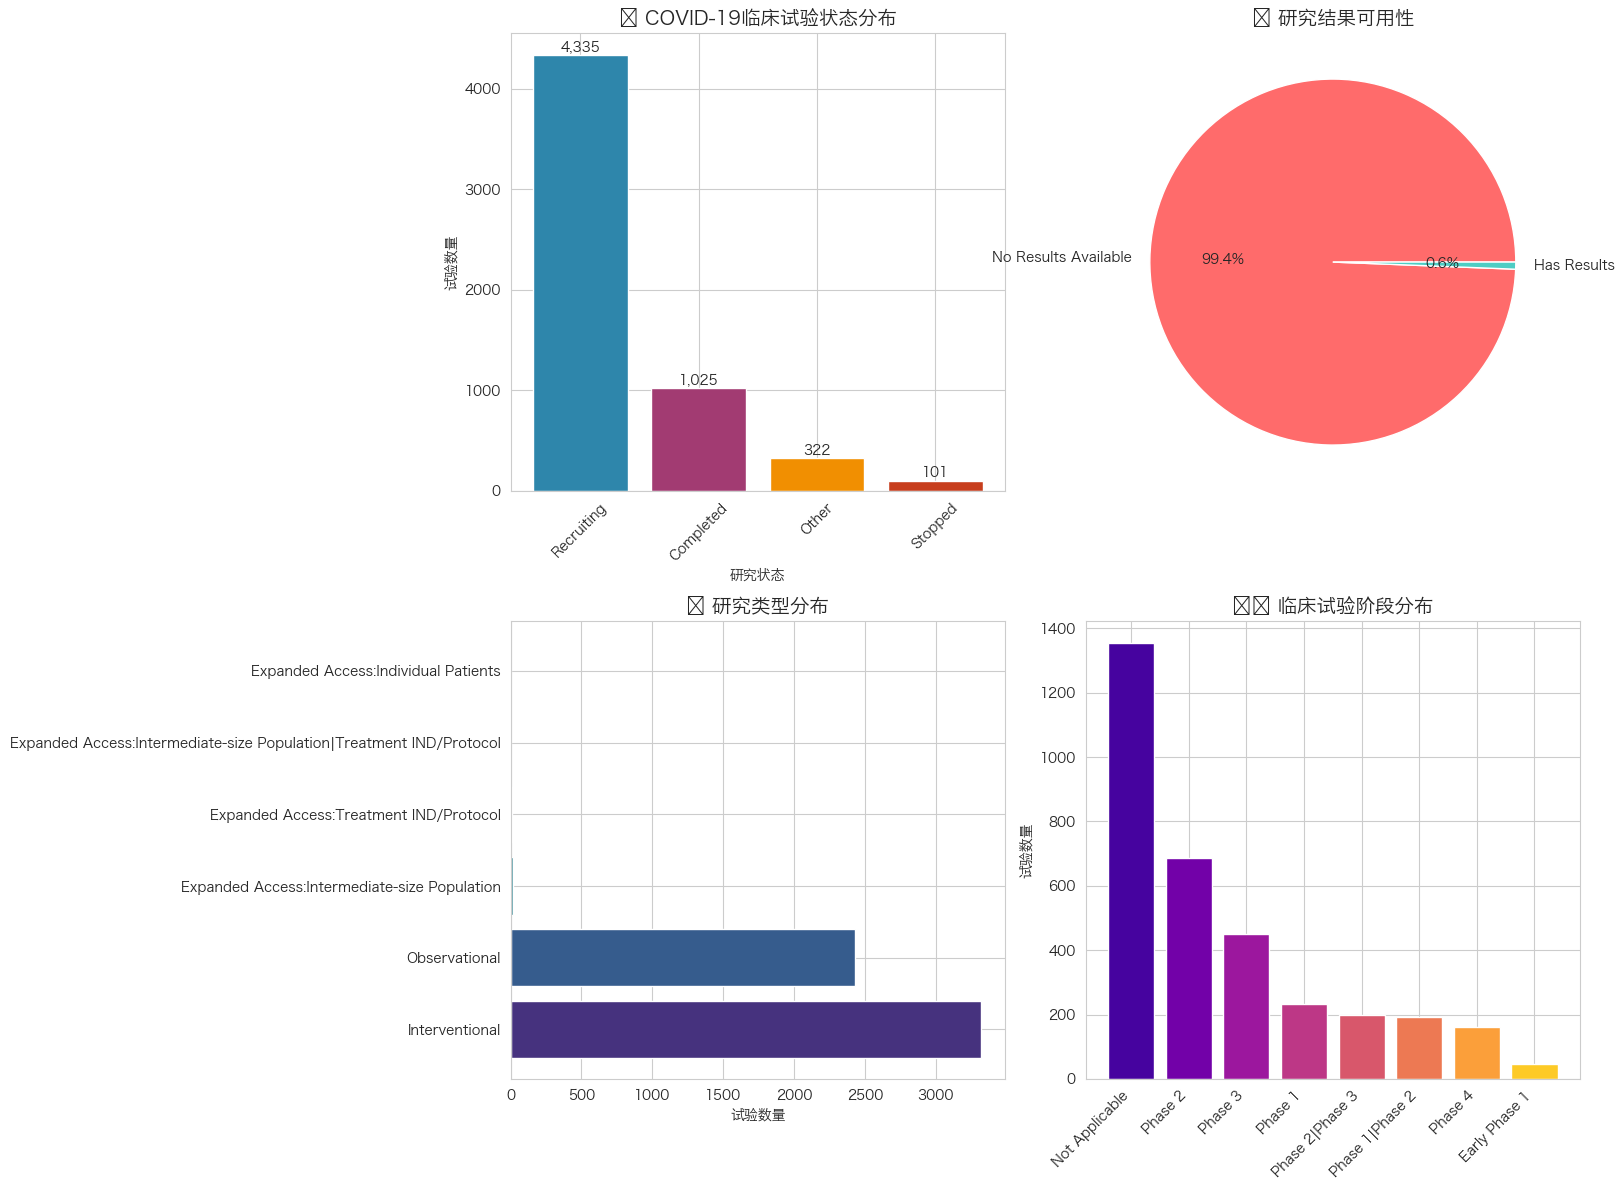

📊 研究状态分析总结：
• 最常见的研究状态: Recruiting (4,335项试验)
• 有研究结果的试验比例: 0.6%
• 最主要的研究类型: Interventional


In [ ]:
# 4.1.1 研究状态分布
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 子图1：研究状态分类条形图
status_counts = df_clean['Status_Category'].value_counts()
bars = axes[0, 0].bar(status_counts.index, status_counts.values,
                     color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#B8B8B8'])
axes[0, 0].set_title('🏥 COVID-19临床试验状态分布', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('研究状态')
axes[0, 0].set_ylabel('试验数量')
axes[0, 0].tick_params(axis='x', rotation=45)

# 添加数值标签
for bar, value in zip(bars, status_counts.values):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                   f'{value:,}', ha='center', va='bottom', fontweight='bold')

# 子图2：是否有研究结果饼图
results_counts = df_clean['Study Results'].value_counts()
axes[0, 1].pie(results_counts.values, labels=results_counts.index, autopct='%1.1f%%',
              colors=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('📊 研究结果可用性', fontsize=14, fontweight='bold')

# 子图3：研究类型分布
study_type_counts = df_clean['Study Type'].value_counts().head(6)
axes[1, 0].barh(range(len(study_type_counts)), study_type_counts.values,
               color=sns.color_palette("viridis", len(study_type_counts)))
axes[1, 0].set_yticks(range(len(study_type_counts)))
axes[1, 0].set_yticklabels(study_type_counts.index)
axes[1, 0].set_title('🔬 研究类型分布', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('试验数量')

# 子图4：临床试验阶段分布
phases_counts = df_clean['Phases'].value_counts().head(8)
axes[1, 1].bar(range(len(phases_counts)), phases_counts.values,
              color=sns.color_palette("plasma", len(phases_counts)))
axes[1, 1].set_xticks(range(len(phases_counts)))
axes[1, 1].set_xticklabels(phases_counts.index, rotation=45, ha='right')
axes[1, 1].set_title('⚗️ 临床试验阶段分布', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('试验数量')

plt.tight_layout()
plt.show()

print("📊 研究状态分析总结：")
print(f"• 最常见的研究状态: {status_counts.index[0]} ({status_counts.iloc[0]:,}项试验)")
print(f"• 有研究结果的试验比例: {df_clean['Has_Results'].mean()*100:.1f}%")
print(f"• 最主要的研究类型: {study_type_counts.index[0]}")

### 4.2 时间趋势分析

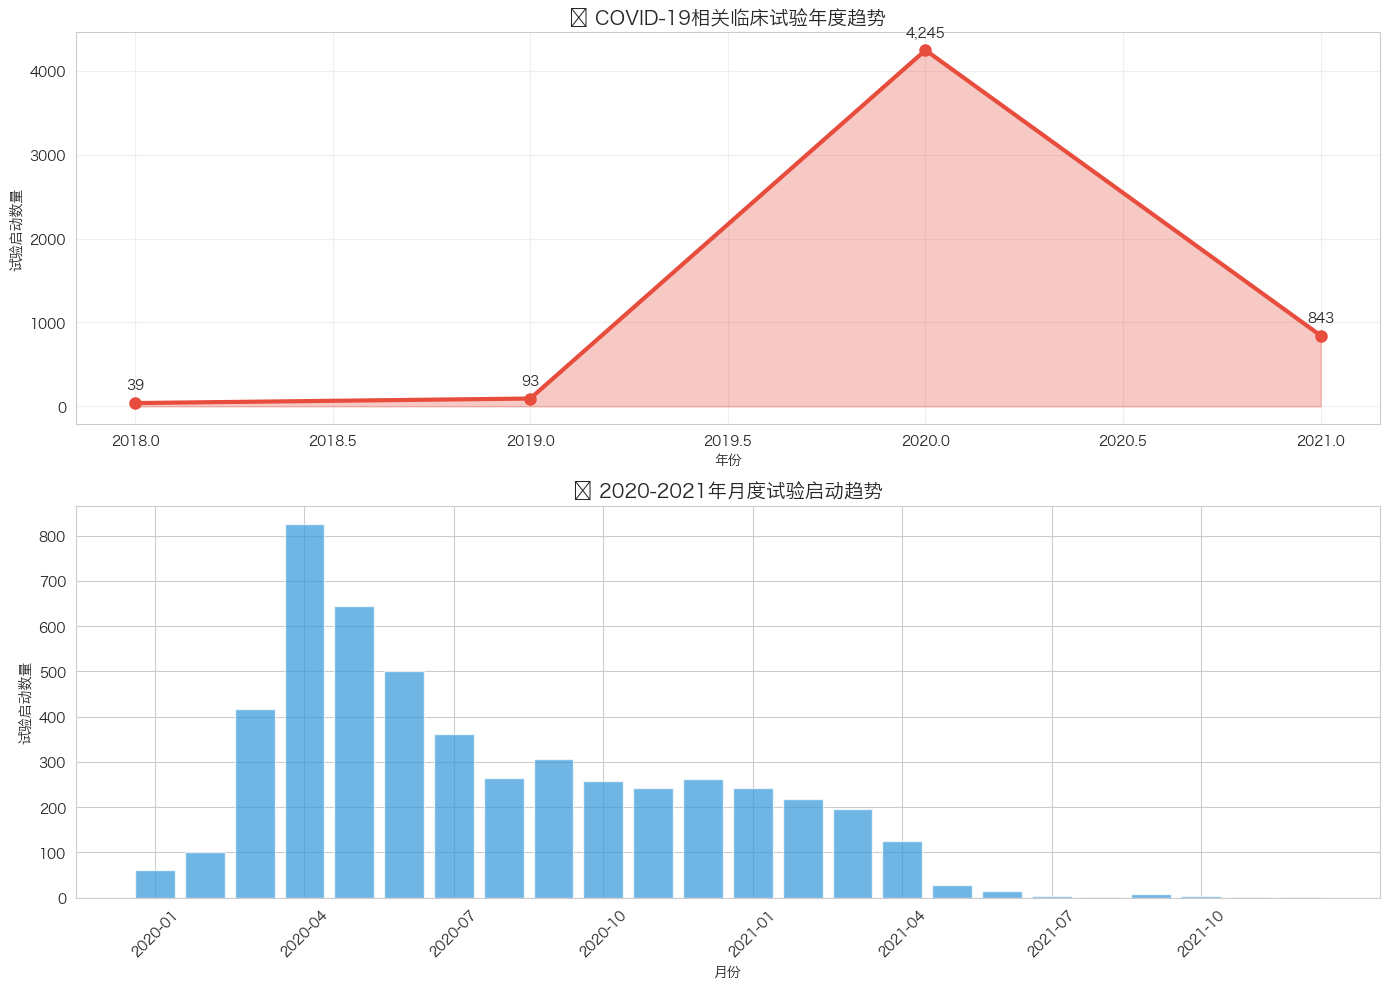

📅 时间趋势分析总结：
• 试验启动最多的年份: 2020.0 (4,245项试验)
• 2020年相比2019年试验增长: 4465%


In [ ]:
# 4.2.1 按年份分析COVID-19试验趋势
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 子图1：按开始年份的试验数量趋势
yearly_counts = df_clean['Start Date_year'].value_counts().sort_index()
# 只显示2018年以后的数据，聚焦COVID-19期间
recent_years = yearly_counts[yearly_counts.index >= 2018]

axes[0].plot(recent_years.index, recent_years.values, marker='o',
            linewidth=3, markersize=8, color='#E74C3C')
axes[0].fill_between(recent_years.index, recent_years.values, alpha=0.3, color='#E74C3C')
axes[0].set_title('📈 COVID-19相关临床试验年度趋势', fontsize=14, fontweight='bold')
axes[0].set_xlabel('年份')
axes[0].set_ylabel('试验启动数量')
axes[0].grid(True, alpha=0.3)

# 添加数值标签
for x, y in zip(recent_years.index, recent_years.values):
    axes[0].annotate(f'{y:,}', (x, y), textcoords="offset points",
                    xytext=(0,10), ha='center', fontweight='bold')

# 子图2：月度试验启动趋势（2020-2021年）
df_2020_2021 = df_clean[
    (df_clean['Start Date_year'].isin([2020, 2021])) &
    (df_clean['Start Date_parsed'].notna())
]

if len(df_2020_2021) > 0:
    df_2020_2021['Start_Month'] = df_2020_2021['Start Date_parsed'].dt.to_period('M')
    monthly_counts = df_2020_2021['Start_Month'].value_counts().sort_index()

    axes[1].bar(range(len(monthly_counts)), monthly_counts.values,
               color='#3498DB', alpha=0.7)
    axes[1].set_xticks(range(0, len(monthly_counts), 3))  # 每3个月显示一个标签
    axes[1].set_xticklabels([str(monthly_counts.index[i]) for i in range(0, len(monthly_counts), 3)],
                           rotation=45)
    axes[1].set_title('📅 2020-2021年月度试验启动趋势', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('月份')
    axes[1].set_ylabel('试验启动数量')

plt.tight_layout()
plt.show()

print("📅 时间趋势分析总结：")
print(f"• 试验启动最多的年份: {yearly_counts.idxmax()} ({yearly_counts.max():,}项试验)")
print(f"• 2020年相比2019年试验增长: {((yearly_counts.get(2020, 0) - yearly_counts.get(2019, 0)) / yearly_counts.get(2019, 1) * 100):.0f}%")

### 4.3 干预措施和研究条件分析

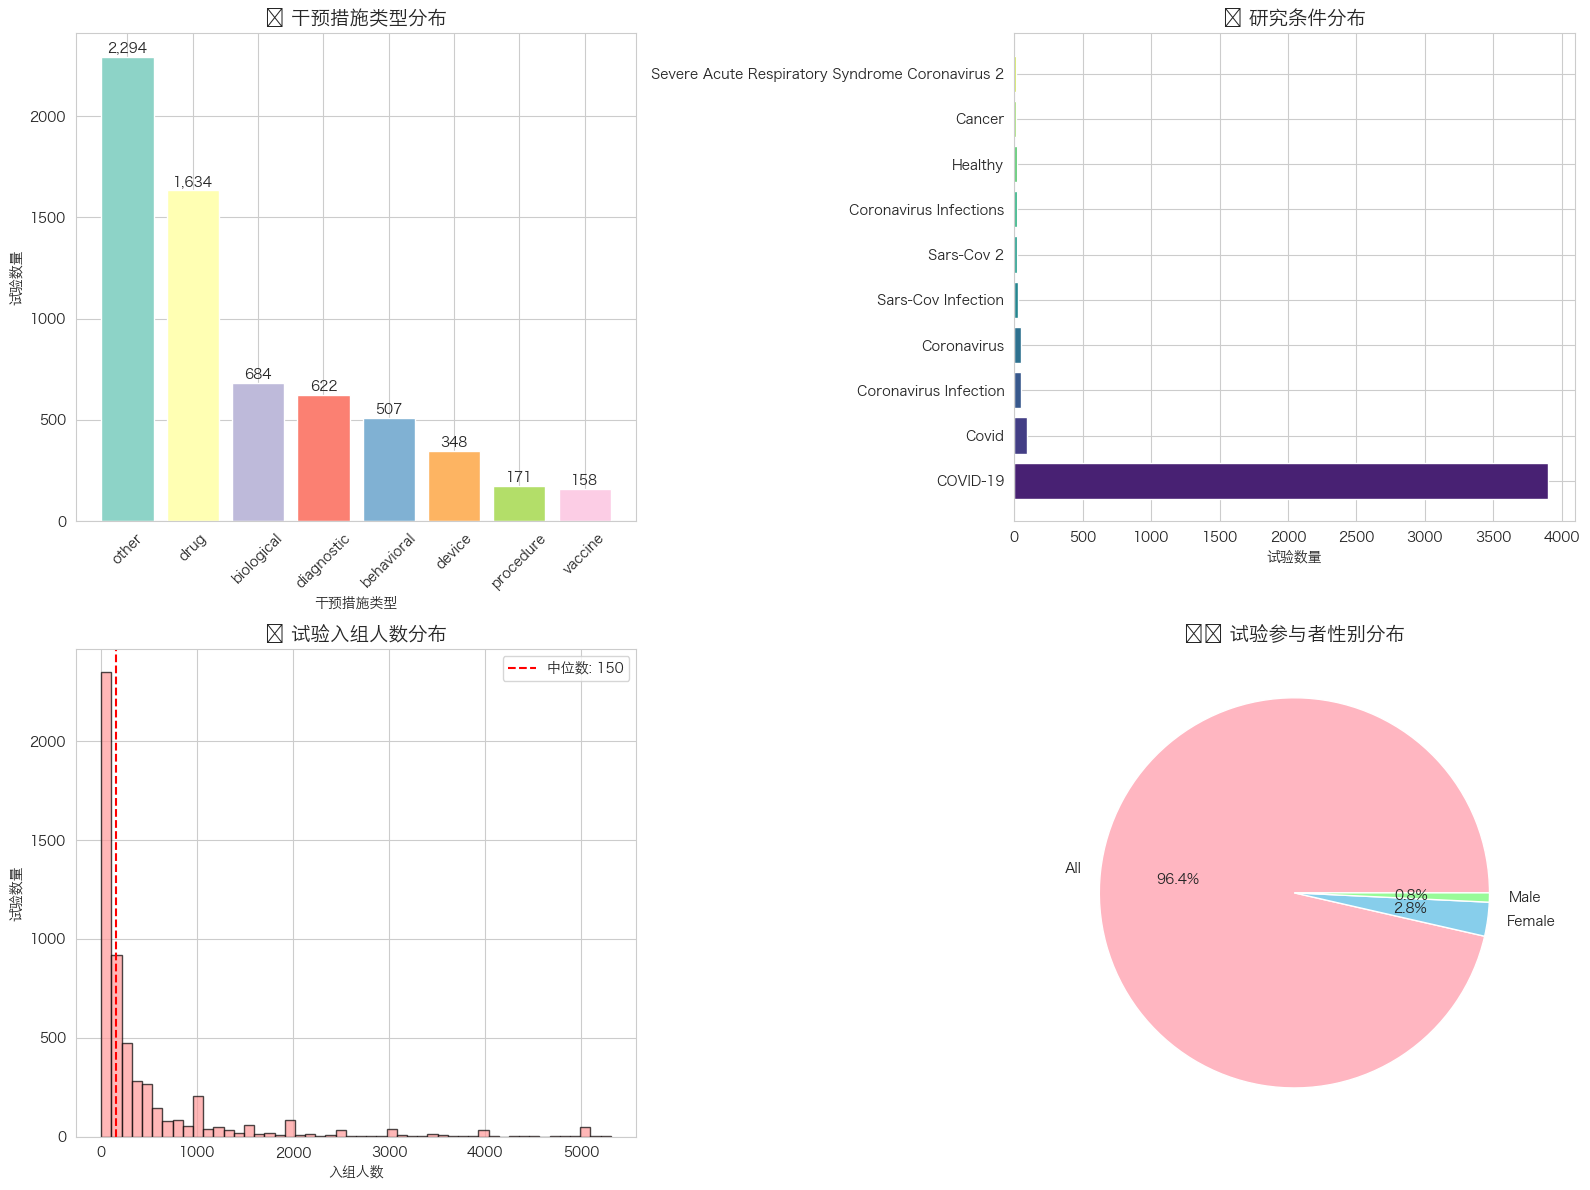

💊 干预措施和研究条件分析总结：
• 最常见的干预措施类型: other
• COVID-19相关试验占比: 67.4%
• 平均入组人数: 469人
• 中位入组人数: 150人


In [ ]:
# 4.3.1 干预措施关键词分析
def extract_intervention_keywords(interventions_text):
    """提取干预措施中的关键词"""
    if pd.isna(interventions_text):
        return []

    text = str(interventions_text).lower()

    # 定义医学关键词
    keywords = {
        'drug': ['drug', 'medication', 'pharmaceutical'],
        'vaccine': ['vaccine', 'vaccination', 'immunization'],
        'device': ['device', 'medical device', 'equipment'],
        'behavioral': ['behavioral', 'behavior', 'lifestyle'],
        'diagnostic': ['diagnostic', 'test', 'testing', 'screening'],
        'procedure': ['procedure', 'surgery', 'surgical'],
        'biological': ['biological', 'biologic', 'antibody'],
        'other': ['other', 'placebo', 'control']
    }

    found_keywords = []
    for category, terms in keywords.items():
        if any(term in text for term in terms):
            found_keywords.append(category)

    return found_keywords if found_keywords else ['unspecified']

# 提取干预措施关键词
df_clean['Intervention_Keywords'] = df_clean['Interventions'].apply(extract_intervention_keywords)

# 统计关键词频率
all_keywords = []
for keywords_list in df_clean['Intervention_Keywords']:
    all_keywords.extend(keywords_list)

keyword_counts = Counter(all_keywords)

# 可视化干预措施分布
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 子图1：干预措施类型分布
top_keywords = dict(keyword_counts.most_common(8))
bars = axes[0, 0].bar(top_keywords.keys(), top_keywords.values(),
                     color=sns.color_palette("Set3", len(top_keywords)))
axes[0, 0].set_title('💊 干预措施类型分布', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('干预措施类型')
axes[0, 0].set_ylabel('试验数量')
axes[0, 0].tick_params(axis='x', rotation=45)

for bar, value in zip(bars, top_keywords.values()):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                   f'{value:,}', ha='center', va='bottom')

# 子图2：研究条件分布
conditions_counts = df_clean['Conditions_Clean'].value_counts().head(10)
axes[0, 1].barh(range(len(conditions_counts)), conditions_counts.values,
               color=sns.color_palette("viridis", len(conditions_counts)))
axes[0, 1].set_yticks(range(len(conditions_counts)))
axes[0, 1].set_yticklabels(conditions_counts.index)
axes[0, 1].set_title('🦠 研究条件分布', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('试验数量')

# 子图3：入组人数分布
enrollment_clean = df_clean['Enrollment_Clean'].dropna()
enrollment_clean = enrollment_clean[enrollment_clean <= enrollment_clean.quantile(0.95)]  # 去除极端值
axes[1, 0].hist(enrollment_clean, bins=50, alpha=0.7, color='#FF9999', edgecolor='black')
axes[1, 0].set_title('👥 试验入组人数分布', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('入组人数')
axes[1, 0].set_ylabel('试验数量')
axes[1, 0].axvline(enrollment_clean.median(), color='red', linestyle='--',
                  label=f'中位数: {enrollment_clean.median():.0f}')
axes[1, 0].legend()

# 子图4：性别分布
gender_counts = df_clean['Gender'].value_counts()
axes[1, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
              colors=['#FFB6C1', '#87CEEB', '#98FB98'])
axes[1, 1].set_title('⚧️ 试验参与者性别分布', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("💊 干预措施和研究条件分析总结：")
print(f"• 最常见的干预措施类型: {list(top_keywords.keys())[0]}")
print(f"• COVID-19相关试验占比: {(df_clean['Conditions_Clean'] == 'COVID-19').mean()*100:.1f}%")
print(f"• 平均入组人数: {enrollment_clean.mean():.0f}人")
print(f"• 中位入组人数: {enrollment_clean.median():.0f}人")

### 4.4 研究赞助方分析

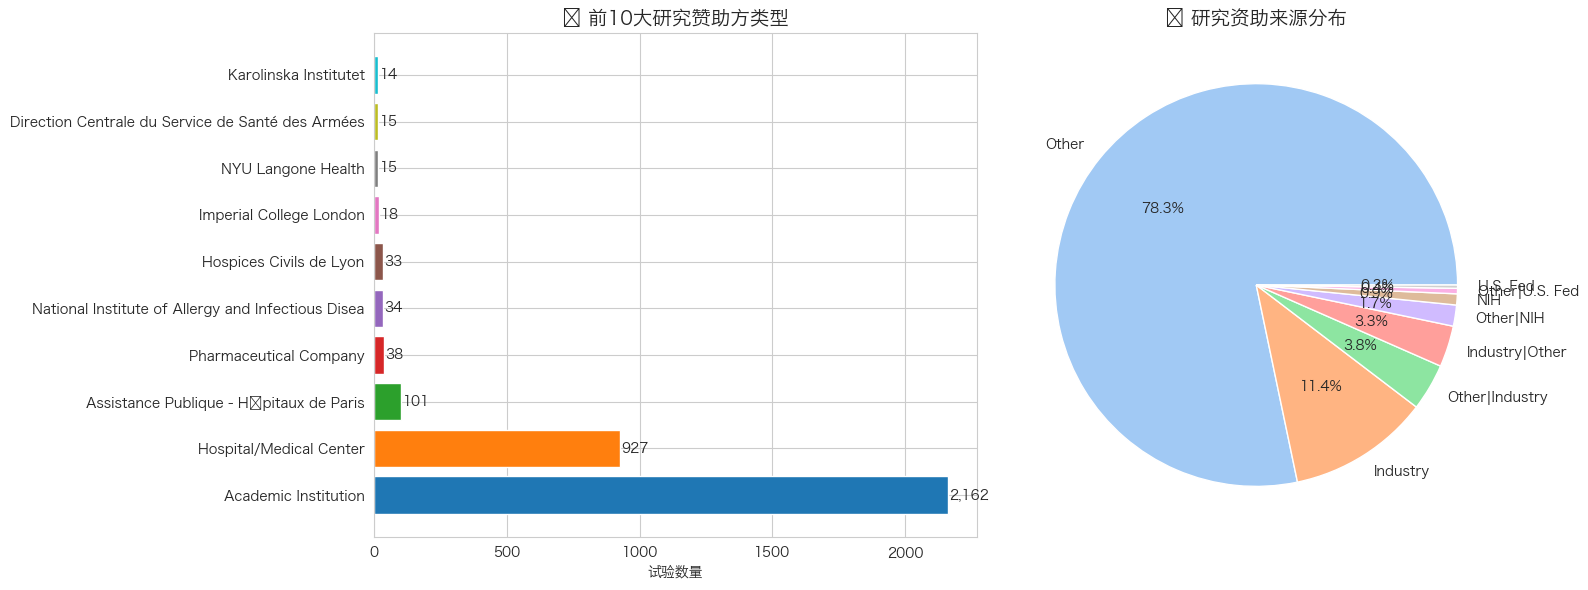

🏢 研究赞助方分析总结：
• 最主要的赞助方类型: Academic Institution (2,162项试验)
• 学术机构赞助的试验数量: 2,162
• 制药公司赞助的试验数量: 38


In [ ]:
# 4.4.1 前10大研究赞助方分析
def extract_primary_sponsor(sponsor_text):
    """提取主要赞助方"""
    if pd.isna(sponsor_text):
        return 'Unknown'

    # 通常第一个就是主要赞助方
    sponsors = str(sponsor_text).split('|')
    primary_sponsor = sponsors[0].strip()

    # 简化一些常见的机构名称
    if 'university' in primary_sponsor.lower():
        return 'Academic Institution'
    elif any(pharma in primary_sponsor.lower() for pharma in ['pfizer', 'moderna', 'astrazeneca', 'johnson', 'roche', 'novartis', 'gsk']):
        return 'Pharmaceutical Company'
    elif any(hospital in primary_sponsor.lower() for hospital in ['hospital', 'medical center', 'clinic']):
        return 'Hospital/Medical Center'
    elif 'government' in primary_sponsor.lower() or 'nih' in primary_sponsor.lower():
        return 'Government Agency'
    else:
        return primary_sponsor[:50]  # 截断长名称

df_clean['Primary_Sponsor_Category'] = df_clean['Sponsor/Collaborators'].apply(extract_primary_sponsor)

# 可视化赞助方分析
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 子图1：赞助方类型分布
sponsor_counts = df_clean['Primary_Sponsor_Category'].value_counts().head(10)
bars = axes[0].barh(range(len(sponsor_counts)), sponsor_counts.values,
                   color=sns.color_palette("tab10", len(sponsor_counts)))
axes[0].set_yticks(range(len(sponsor_counts)))
axes[0].set_yticklabels(sponsor_counts.index, fontsize=10)
axes[0].set_title('🏢 前10大研究赞助方类型', fontsize=14, fontweight='bold')
axes[0].set_xlabel('试验数量')

# 添加数值标签
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0].text(width + 5, bar.get_y() + bar.get_height()/2,
                f'{int(width):,}', ha='left', va='center')

# 子图2：资助类型分布
funding_counts = df_clean['Funded Bys'].value_counts().head(8)
axes[1].pie(funding_counts.values, labels=funding_counts.index, autopct='%1.1f%%',
           colors=sns.color_palette("pastel", len(funding_counts)))
axes[1].set_title('💰 研究资助来源分布', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("🏢 研究赞助方分析总结：")
print(f"• 最主要的赞助方类型: {sponsor_counts.index[0]} ({sponsor_counts.iloc[0]:,}项试验)")
print(f"• 学术机构赞助的试验数量: {sponsor_counts.get('Academic Institution', 0):,}")
print(f"• 制药公司赞助的试验数量: {sponsor_counts.get('Pharmaceutical Company', 0):,}")

## 5. 📈 高级可视化分析

使用seaborn进行更深入的统计可视化分析：

### 5.1 研究状态与干预措施的交叉分析

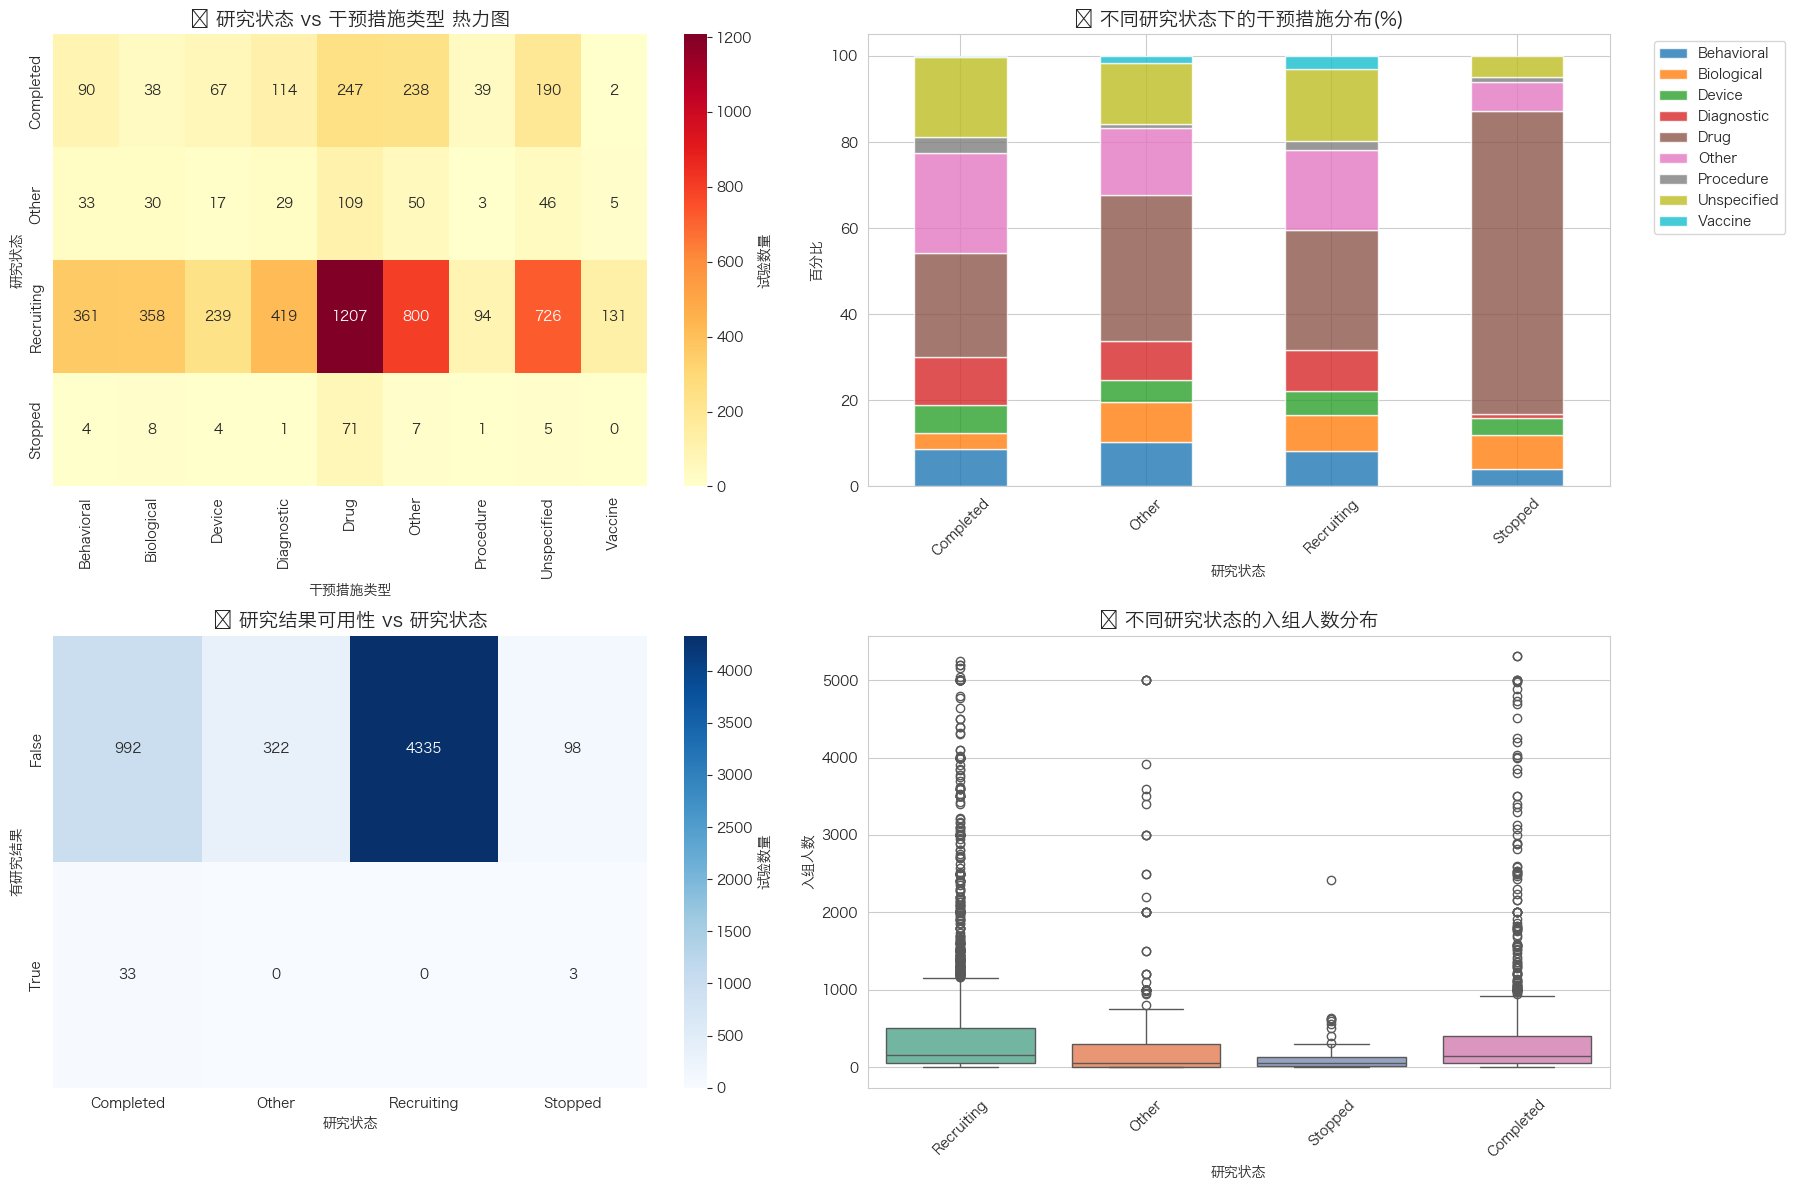

📊 交叉分析总结：
• 最常见的状态-干预组合: ('Recruiting', 'Drug')
• 完成研究中有结果的比例: 3.2%


In [ ]:
# 5.1.1 创建状态与干预措施的交叉表
# 首先为每个试验分配主要的干预措施类型
def get_primary_intervention(keywords_list):
    """获取主要干预措施类型"""
    if not keywords_list or keywords_list == ['unspecified']:
        return 'Unspecified'
    return keywords_list[0].title()

df_clean['Primary_Intervention'] = df_clean['Intervention_Keywords'].apply(get_primary_intervention)

# 创建交叉表
cross_tab = pd.crosstab(df_clean['Status_Category'], df_clean['Primary_Intervention'])

# 可视化交叉分析
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 子图1：状态与干预措施热力图
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd',
           ax=axes[0, 0], cbar_kws={'label': '试验数量'})
axes[0, 0].set_title('🔥 研究状态 vs 干预措施类型 热力图', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('干预措施类型')
axes[0, 0].set_ylabel('研究状态')

# 子图2：按状态分组的干预措施分布
status_intervention = df_clean.groupby(['Status_Category', 'Primary_Intervention']).size().unstack(fill_value=0)
status_intervention_pct = status_intervention.div(status_intervention.sum(axis=1), axis=0) * 100

status_intervention_pct.plot(kind='bar', stacked=True, ax=axes[0, 1],
                           colormap='tab10', alpha=0.8)
axes[0, 1].set_title('📊 不同研究状态下的干预措施分布(%)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('研究状态')
axes[0, 1].set_ylabel('百分比')
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].tick_params(axis='x', rotation=45)

# 子图3：研究结果可用性vs研究状态
results_status_crosstab = pd.crosstab(df_clean['Has_Results'], df_clean['Status_Category'])
sns.heatmap(results_status_crosstab, annot=True, fmt='d', cmap='Blues',
           ax=axes[1, 0], cbar_kws={'label': '试验数量'})
axes[1, 0].set_title('💊 研究结果可用性 vs 研究状态', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('研究状态')
axes[1, 0].set_ylabel('有研究结果')

# 子图4：入组人数按研究状态的箱线图
enrollment_by_status = df_clean[df_clean['Enrollment_Clean'].notna() &
                               (df_clean['Enrollment_Clean'] <= df_clean['Enrollment_Clean'].quantile(0.95))]

sns.boxplot(data=enrollment_by_status, x='Status_Category', y='Enrollment_Clean',
           ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('👥 不同研究状态的入组人数分布', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('研究状态')
axes[1, 1].set_ylabel('入组人数')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📊 交叉分析总结：")
print(f"• 最常见的状态-干预组合: {cross_tab.stack().idxmax()}")
print(f"• 完成研究中有结果的比例: {results_status_crosstab.loc[True, 'Completed'] / results_status_crosstab['Completed'].sum() * 100:.1f}%")

### 5.2 时间序列和相关性分析

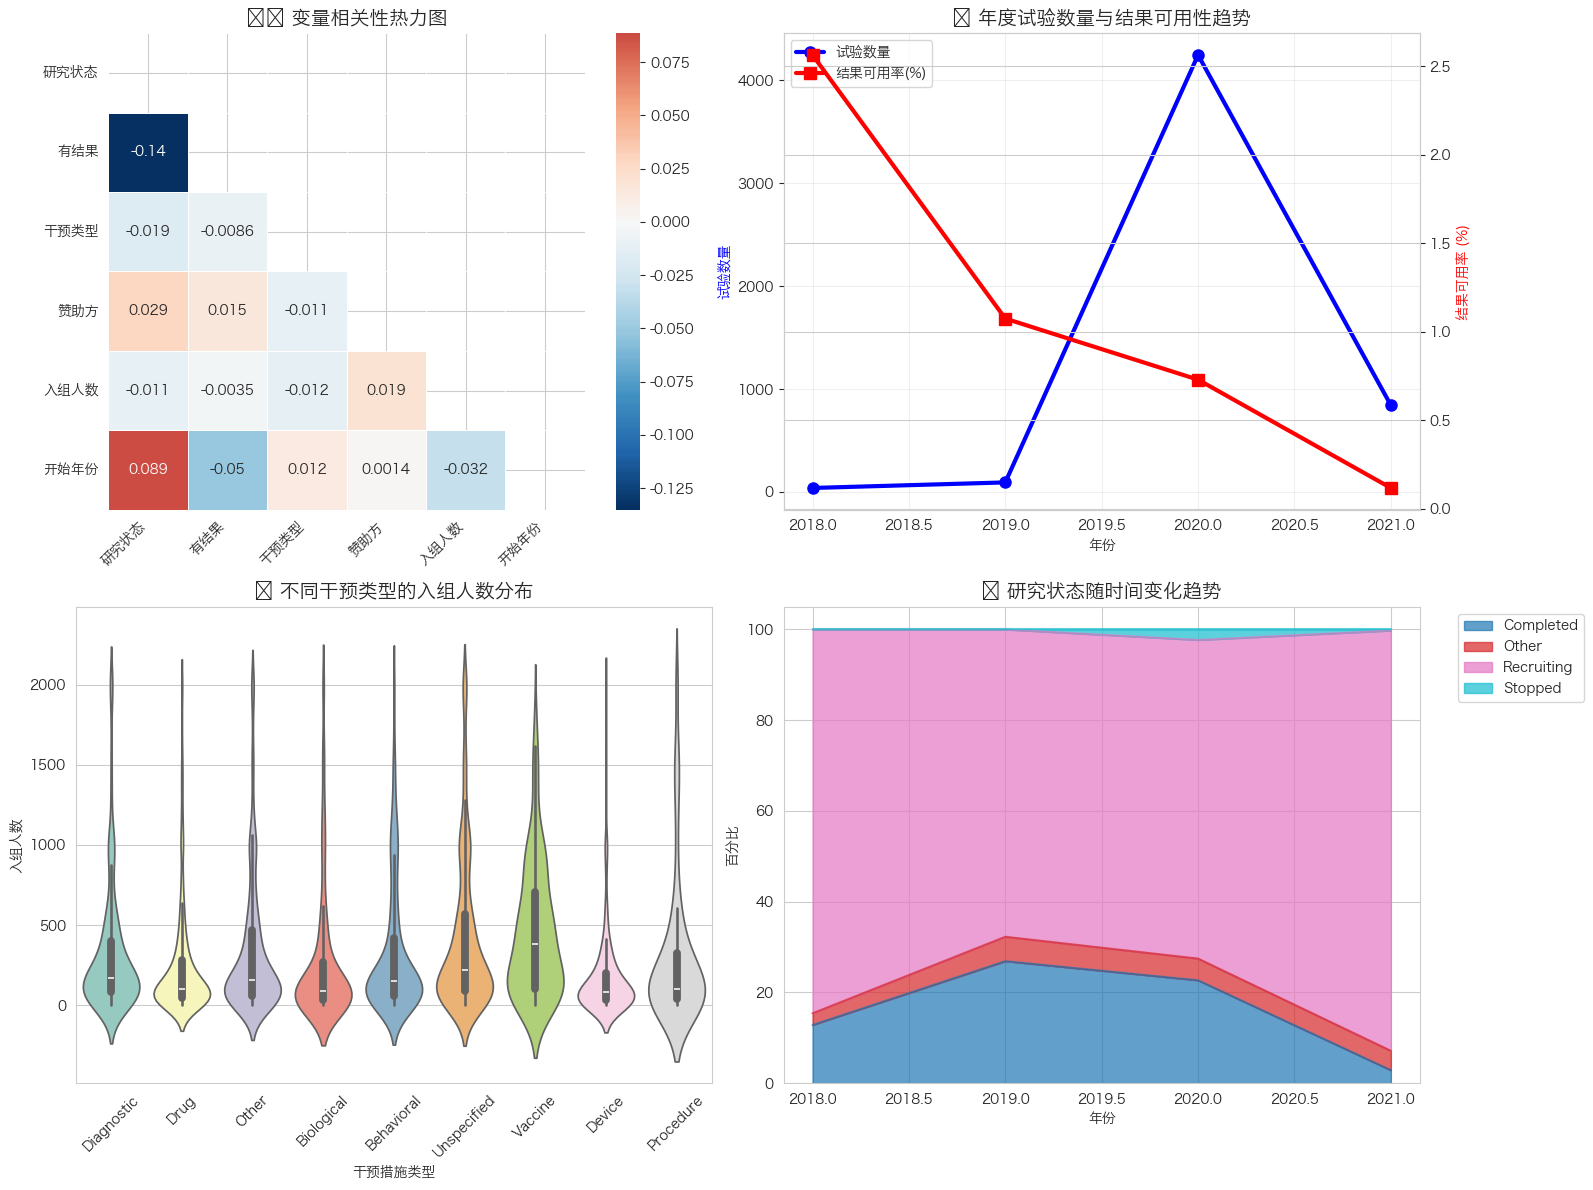

📈 相关性和趋势分析总结：
• 入组人数与有结果的相关性: -0.004
• 2020年试验结果可用率: 0.7%


In [ ]:
# 5.2.1 创建数值化数据进行相关性分析
# 创建数值化的状态、结果等字段
numerical_df = df_clean.copy()

# 编码分类变量
from sklearn.preprocessing import LabelEncoder

le_status = LabelEncoder()
le_intervention = LabelEncoder()
le_sponsor = LabelEncoder()

numerical_df['Status_Encoded'] = le_status.fit_transform(df_clean['Status_Category'])
numerical_df['Intervention_Encoded'] = le_intervention.fit_transform(df_clean['Primary_Intervention'])
numerical_df['Sponsor_Encoded'] = le_sponsor.fit_transform(df_clean['Primary_Sponsor_Category'])
numerical_df['Has_Results_Numeric'] = df_clean['Has_Results'].astype(int)

# 选择数值型字段进行相关性分析
correlation_columns = [
    'Status_Encoded', 'Has_Results_Numeric', 'Intervention_Encoded',
    'Sponsor_Encoded', 'Enrollment_Clean', 'Start Date_year'
]

corr_data = numerical_df[correlation_columns].dropna()
correlation_matrix = corr_data.corr()

# 可视化相关性和时间趋势
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 子图1：相关性热力图
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           ax=axes[0, 0], square=True, linewidths=0.5)
axes[0, 0].set_title('🌡️ 变量相关性热力图', fontsize=14, fontweight='bold')

# 设置更友好的标签
friendly_labels = ['研究状态', '有结果', '干预类型', '赞助方', '入组人数', '开始年份']
axes[0, 0].set_xticklabels(friendly_labels, rotation=45, ha='right')
axes[0, 0].set_yticklabels(friendly_labels, rotation=0)

# 子图2：年度试验数量与结果可用性趋势
yearly_results = df_clean.groupby('Start Date_year').agg({
    'NCT Number': 'count',
    'Has_Results': 'mean'
}).rename(columns={'NCT Number': 'Trial_Count', 'Has_Results': 'Results_Rate'})

yearly_results = yearly_results[yearly_results.index >= 2018]  # 聚焦近年数据

ax2 = axes[0, 1]
ax2_twin = ax2.twinx()

line1 = ax2.plot(yearly_results.index, yearly_results['Trial_Count'],
                'b-o', linewidth=3, markersize=8, label='试验数量')
line2 = ax2_twin.plot(yearly_results.index, yearly_results['Results_Rate'] * 100,
                     'r-s', linewidth=3, markersize=8, label='结果可用率(%)')

ax2.set_xlabel('年份')
ax2.set_ylabel('试验数量', color='b')
ax2_twin.set_ylabel('结果可用率 (%)', color='r')
ax2.set_title('📈 年度试验数量与结果可用性趋势', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 合并图例
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')

# 子图3：入组人数分布按干预类型
enrollment_intervention = df_clean[
    (df_clean['Enrollment_Clean'].notna()) &
    (df_clean['Enrollment_Clean'] <= df_clean['Enrollment_Clean'].quantile(0.90))
]

sns.violinplot(data=enrollment_intervention, x='Primary_Intervention', y='Enrollment_Clean',
              ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('🎻 不同干预类型的入组人数分布', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('干预措施类型')
axes[1, 0].set_ylabel('入组人数')
axes[1, 0].tick_params(axis='x', rotation=45)

# 子图4：研究状态随时间的变化
status_year = pd.crosstab(df_clean['Start Date_year'], df_clean['Status_Category'])
status_year = status_year[status_year.index >= 2018]
status_year_pct = status_year.div(status_year.sum(axis=1), axis=0) * 100

status_year_pct.plot(kind='area', stacked=True, ax=axes[1, 1],
                    colormap='tab10', alpha=0.7)
axes[1, 1].set_title('📊 研究状态随时间变化趋势', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('年份')
axes[1, 1].set_ylabel('百分比')
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("📈 相关性和趋势分析总结：")
print(f"• 入组人数与有结果的相关性: {correlation_matrix.loc['Enrollment_Clean', 'Has_Results_Numeric']:.3f}")
print(f"• 2020年试验结果可用率: {yearly_results.loc[2020, 'Results_Rate']*100:.1f}%")

## 6. 📉 统计分析 (Scipy)

进行假设检验和统计推断：

### 6.1 研究状态差异的统计检验

In [ ]:
# 6.1.1 检验Recruiting状态的试验比例是否显著高于Completed
recruiting_count = (df_clean['Status_Category'] == 'Recruiting').sum()
completed_count = (df_clean['Status_Category'] == 'Completed').sum()
total_trials = len(df_clean)

recruiting_prop = recruiting_count / total_trials
completed_prop = completed_count / total_trials

print("🧪 假设检验1: Recruiting vs Completed状态比例差异")
print("="*60)
print(f"H0: Recruiting状态比例 = Completed状态比例")
print(f"H1: Recruiting状态比例 ≠ Completed状态比例")
print(f"\n观察数据:")
print(f"Recruiting试验: {recruiting_count:,} ({recruiting_prop:.3f})")
print(f"Completed试验: {completed_count:,} ({completed_prop:.3f})")
print(f"差异: {recruiting_prop - completed_prop:.3f}")

# 使用双比例z检验
from scipy.stats import norm

# 计算合并比例
pooled_prop = (recruiting_count + completed_count) / (2 * total_trials)
se = np.sqrt(pooled_prop * (1 - pooled_prop) * (2 / total_trials))
z_stat = (recruiting_prop - completed_prop) / se
p_value_two_tailed = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"\n检验结果:")
print(f"Z统计量: {z_stat:.4f}")
print(f"p值 (双尾): {p_value_two_tailed:.6f}")

alpha = 0.05
if p_value_two_tailed < alpha:
    conclusion1 = "拒绝原假设"
    interpretation1 = "Recruiting和Completed状态的比例有显著差异"
else:
    conclusion1 = "不能拒绝原假设"
    interpretation1 = "Recruiting和Completed状态的比例无显著差异"

print(f"结论 (α = {alpha}): {conclusion1}")
print(f"解释: {interpretation1}")

🧪 假设检验1: Recruiting vs Completed状态比例差异
H0: Recruiting状态比例 = Completed状态比例
H1: Recruiting状态比例 ≠ Completed状态比例

观察数据:
Recruiting试验: 4,335 (0.750)
Completed试验: 1,025 (0.177)
差异: 0.572

检验结果:
Z统计量: 61.7208
p值 (双尾): 0.000000
结论 (α = 0.05): 拒绝原假设
解释: Recruiting和Completed状态的比例有显著差异


### 6.2 COVID-19试验与其他试验的结果可用性差异


🧪 假设检验2: COVID-19试验 vs 其他试验的结果可用性
H0: COVID-19试验结果可用率 = 其他试验结果可用率
H1: COVID-19试验结果可用率 ≠ 其他试验结果可用率

观察数据:
COVID-19试验: 24/3899 (0.006)
其他试验: 12/1884 (0.006)
差异: -0.000

检验结果 (卡方检验):
卡方统计量: 0.0000
自由度: 1
p值: 1.000000
结论 (α = 0.05): 不能拒绝原假设
解释: COVID-19试验与其他试验的结果可用率无显著差异


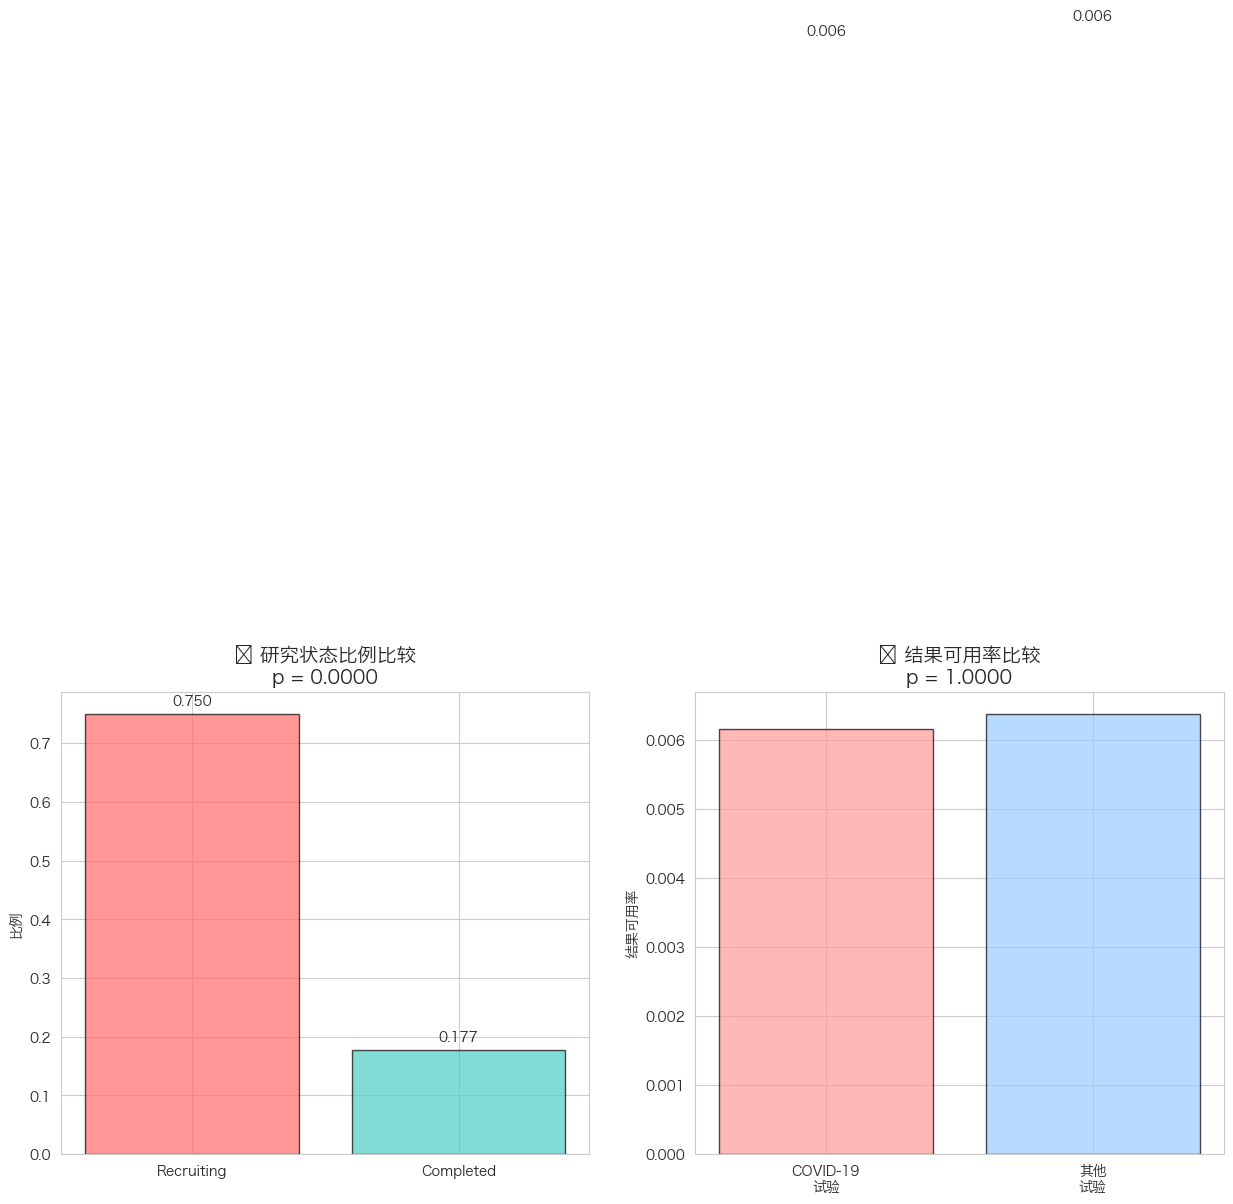


📊 统计检验总结:
• 检验1: Recruiting和Completed状态的比例有显著差异
• 检验2: COVID-19试验与其他试验的结果可用率无显著差异


In [ ]:
# 6.2.1 比较COVID-19试验与其他试验的结果可用性
covid_trials = df_clean[df_clean['Conditions_Clean'] == 'COVID-19']
other_trials = df_clean[df_clean['Conditions_Clean'] != 'COVID-19']

covid_has_results = covid_trials['Has_Results'].sum()
covid_total = len(covid_trials)
other_has_results = other_trials['Has_Results'].sum()
other_total = len(other_trials)

covid_results_rate = covid_has_results / covid_total
other_results_rate = other_has_results / other_total

print("\n🧪 假设检验2: COVID-19试验 vs 其他试验的结果可用性")
print("="*60)
print(f"H0: COVID-19试验结果可用率 = 其他试验结果可用率")
print(f"H1: COVID-19试验结果可用率 ≠ 其他试验结果可用率")
print(f"\n观察数据:")
print(f"COVID-19试验: {covid_has_results}/{covid_total} ({covid_results_rate:.3f})")
print(f"其他试验: {other_has_results}/{other_total} ({other_results_rate:.3f})")
print(f"差异: {covid_results_rate - other_results_rate:.3f}")

# 使用卡方检验
contingency_table = np.array([
    [covid_has_results, covid_total - covid_has_results],
    [other_has_results, other_total - other_has_results]
])

chi2, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"\n检验结果 (卡方检验):")
print(f"卡方统计量: {chi2:.4f}")
print(f"自由度: {dof}")
print(f"p值: {p_value_chi2:.6f}")

if p_value_chi2 < alpha:
    conclusion2 = "拒绝原假设"
    interpretation2 = "COVID-19试验与其他试验的结果可用率有显著差异"
else:
    conclusion2 = "不能拒绝原假设"
    interpretation2 = "COVID-19试验与其他试验的结果可用率无显著差异"

print(f"结论 (α = {alpha}): {conclusion2}")
print(f"解释: {interpretation2}")

# 可视化两个假设检验结果
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 子图1：状态比例比较
status_props = [recruiting_prop, completed_prop]
status_labels = ['Recruiting', 'Completed']
colors1 = ['#FF6B6B', '#4ECDC4']

bars1 = axes[0].bar(status_labels, status_props, color=colors1, alpha=0.7, edgecolor='black')
axes[0].set_title(f'📊 研究状态比例比较\np = {p_value_two_tailed:.4f}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('比例')

# 添加数值标签
for bar, prop in zip(bars1, status_props):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{prop:.3f}', ha='center', va='bottom', fontweight='bold')

# 子图2：结果可用性比较
results_rates = [covid_results_rate, other_results_rate]
trial_labels = ['COVID-19\n试验', '其他\n试验']
colors2 = ['#FF9999', '#99CCFF']

bars2 = axes[1].bar(trial_labels, results_rates, color=colors2, alpha=0.7, edgecolor='black')
axes[1].set_title(f'📊 结果可用率比较\np = {p_value_chi2:.4f}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('结果可用率')

# 添加数值标签
for bar, rate in zip(bars2, results_rates):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{rate:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 统计检验总结:")
print(f"• 检验1: {interpretation1}")
print(f"• 检验2: {interpretation2}")

## 7. 🎯 研究发现总结与医学研究意义

基于我们的数据分析，让我们总结主要发现并讨论其对医学研究的意义：